In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# read dataset
data = pd.read_csv('/content/Synthetic_Financial_datasets_log.csv')

In [ ]:
# top rows
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
# number of rows and columns
data.shape

(3776513, 11)

In [ ]:
# information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776513 entries, 0 to 3776512
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 316.9+ MB


In [ ]:
# description of dataset (statistical)
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.776513e+06,3.776513e+06,3.776513e+06,3.776513e+06,3.776513e+06,3.776513e+06,3.776512e+06,3.776512e+06
mean,1.510970e+02,1.559339e+05,8.389434e+05,8.603783e+05,9.932040e+05,1.095579e+06,8.396637e-04,7.943838e-07
std,8.634149e+01,3.088134e+05,2.905207e+06,2.941593e+06,2.310984e+06,2.406655e+06,2.896479e-02,8.912819e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.300000e+01,1.233428e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.640000e+02,7.494313e+04,1.455600e+04,0.000000e+00,1.360952e+05,2.199631e+05,0.000000e+00,0.000000e+00
75%,2.260000e+02,2.082096e+05,1.109890e+05,1.497765e+05,9.379838e+05,1.112626e+06,0.000000e+00,0.000000e+00
max,2.800000e+02,9.244552e+07,3.893942e+07,3.894623e+07,1.464127e+08,1.926246e+08,1.000000e+00,1.000000e+00


In [ ]:
# checking missing values
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,1


In [ ]:
# removing missing values
data = data.dropna()

In [ ]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['type'])

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)    # means except isFraud column, we are taking all other as features and axis=1 consideer the whole column
y = data['isFraud']           # now isFraud is the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9997166699986628
Precision: 0.815748031496063
Recall: 0.8422764227642277
F1 Score: 0.8288
Confusion Matrix:
 [[754571    117]
 [    97    518]]


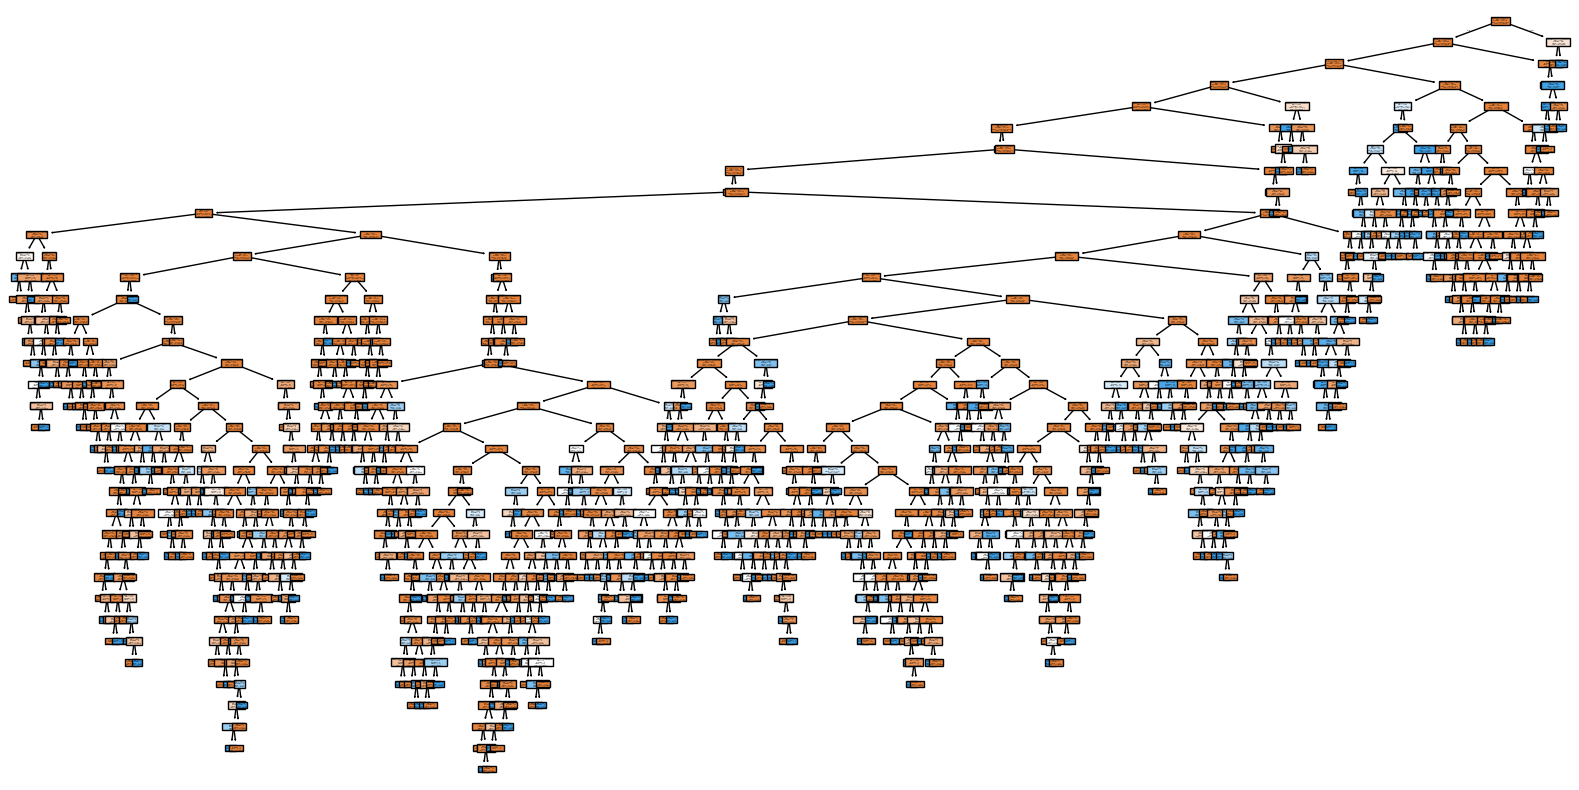

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'])
plt.show()